In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/machine-learning-starter-program-hackathon/train.csv
/kaggle/input/machine-learning-starter-program-hackathon/test.csv
/kaggle/input/machine-learning-starter-program-hackathon/sample_submission.csv


In [2]:
# load data
train = pd.read_csv('/kaggle/input/machine-learning-starter-program-hackathon/train.csv', index_col='id')
test = pd.read_csv('/kaggle/input/machine-learning-starter-program-hackathon/test.csv', index_col='id')

In [3]:
# see data shape
print(train.shape)
print(test.shape)

(73147, 15)
(31349, 14)


In [4]:
# summary of data
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73147 entries, 9389_150 to 4467_119
Data columns (total 15 columns):
program_id                   73147 non-null object
program_type                 73147 non-null object
program_duration             73147 non-null int64
test_id                      73147 non-null int64
test_type                    73147 non-null object
difficulty_level             73147 non-null object
trainee_id                   73147 non-null int64
gender                       73147 non-null object
education                    73147 non-null object
city_tier                    73147 non-null int64
age                          45418 non-null float64
total_programs_enrolled      73147 non-null int64
is_handicapped               73147 non-null object
trainee_engagement_rating    73070 non-null float64
is_pass                      73147 non-null int64
dtypes: float64(2), int64(6), object(7)
memory usage: 8.9+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 31349 entries, 162

age and trainee_engagement_rating have missing values in both train and test data

In [5]:
# check first few data
train.head()

,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
id,,,,,,,,,,,,,,,
9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


In [6]:
#summary of data
train.describe(include='all')

,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
count,73147,73147,73147.000000,73147.000000,73147,73147,73147.000000,73147,73147,73147.000000,45418.000000,73147.000000,73147,73070.000000,73147.000000
unique,22,7,NaN,NaN,2,4,NaN,2,5,NaN,NaN,NaN,2,NaN,NaN
top,Y_1,Y,NaN,NaN,offline,easy,NaN,M,High School Diploma,NaN,NaN,NaN,N,NaN,NaN
freq,6687,22560,NaN,NaN,43543,40101,NaN,39043,34371,NaN,NaN,NaN,66577,NaN,NaN
mean,NaN,NaN,128.208676,91.079306,NaN,NaN,9843.079620,NaN,NaN,2.246845,36.494033,2.583934,NaN,2.395634,0.695408
std,NaN,NaN,6.889679,51.239048,NaN,NaN,5703.556093,NaN,NaN,1.011587,9.041119,1.240816,NaN,1.325288,0.460238
min,NaN,NaN,117.000000,0.000000,NaN,NaN,1.000000,NaN,NaN,1.000000,17.000000,1.000000,NaN,1.000000,0.000000
25%,NaN,NaN,121.000000,45.000000,NaN,NaN,5040.000000,NaN,NaN,1.000000,28.000000,2.000000,NaN,1.000000,0.000000
50%,NaN,NaN,131.000000,90.000000,NaN,NaN,9641.000000,NaN,NaN,2.000000,39.000000,2.000000,NaN,2.000000,1.000000
75%,NaN,NaN,134.000000,135.000000,NaN,NaN,14552.000000,NaN,NaN,3.000000,45.000000,3.000000,NaN,4.000000,1.000000


In [7]:
# check program_id with program type
pd.crosstab(train.program_id, train.program_type)

program_type,S,T,U,V,X,Y,Z
program_id,,,,,,,
S_1,644,0,0,0,0,0,0
S_2,682,0,0,0,0,0,0
T_1,0,3152,0,0,0,0,0
T_2,0,4266,0,0,0,0,0
T_3,0,6248,0,0,0,0,0
T_4,0,4792,0,0,0,0,0
U_1,0,0,4748,0,0,0,0
U_2,0,0,3073,0,0,0,0
V_1,0,0,0,3409,0,0,0


In [8]:
pd.crosstab(train.program_id, train.program_duration)

program_duration,117,120,121,122,130,131,133,134,135,136
program_id,,,,,,,,,,
S_1,0,0,0,0,0,0,0,0,644,0
S_2,0,0,0,0,0,0,0,682,0,0
T_1,0,0,0,0,0,3152,0,0,0,0
T_2,4266,0,0,0,0,0,0,0,0,0
T_3,0,0,0,0,0,0,0,6248,0,0
T_4,0,4792,0,0,0,0,0,0,0,0
U_1,0,0,0,0,0,0,0,4748,0,0
U_2,0,0,0,3073,0,0,0,0,0,0
V_1,0,0,0,0,0,0,3409,0,0,0


In [9]:
pd.crosstab(train.difficulty_level, train.test_type)

test_type,offline,online
difficulty_level,,
easy,10497,29604
hard,10297,0
intermediate,20668,0
vary hard,2081,0


In [10]:
train.program_type.unique()

array(['Y', 'T', 'Z', 'V', 'U', 'X', 'S'], dtype=object)

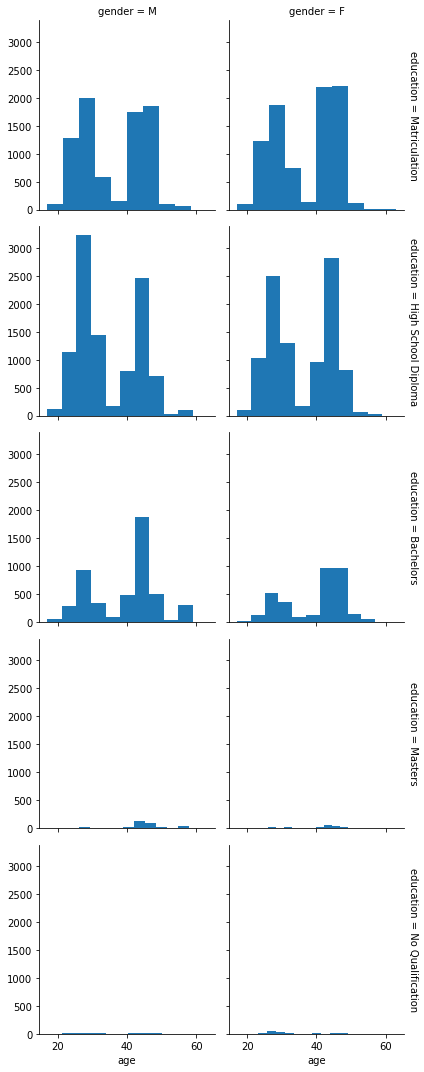

In [11]:
#check age distribution
# Histogram
g = sns.FacetGrid(train, row="education", col="gender", margin_titles=True)
g.map(plt.hist, "age")


There are two groups of age taking the program. For now let's decide using mean for the missing answers.

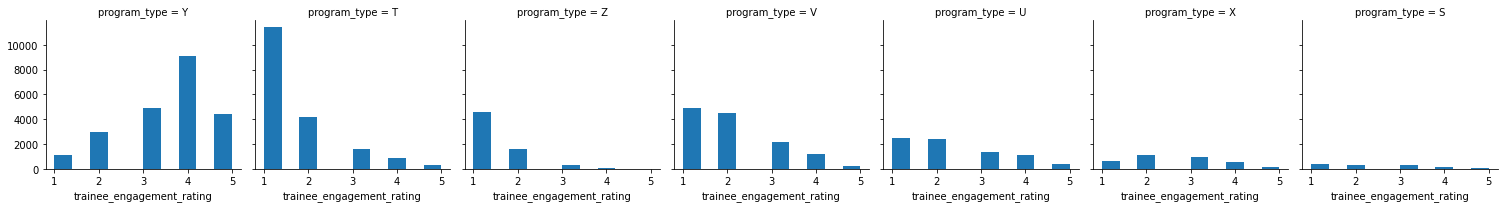

In [12]:
#check trainee_engagement_rating distribution
# Histogram
g = sns.FacetGrid(train, col="program_type", margin_titles=True)
g.map(plt.hist, "trainee_engagement_rating")

In [13]:
for person in train[train['trainee_engagement_rating'].isnull()]['trainee_id'].unique():
    person_data = train[train['trainee_id']==person]
    print(person_data[['trainee_id','trainee_engagement_rating','program_id']])

          trainee_id  trainee_engagement_rating program_id
id                                                        
8697_149        8697                        NaN        Y_1
8697_130        8697                        4.0        Y_3
8697_125        8697                        4.0        Y_3
         trainee_id  trainee_engagement_rating program_id
id                                                       
6783_81        6783                        NaN        V_3
6783_74        6783                        1.0        V_4
6783_73        6783                        1.0        V_4
6783_80        6783                        NaN        V_3
         trainee_id  trainee_engagement_rating program_id
id                                                       
4392_29        4392                        NaN        T_3
4392_28        4392                        NaN        T_3
4392_22        4392                        NaN        T_3
         trainee_id  trainee_engagement_rating program_id
id       

There are some data in rating for the same trainee id. Can use the mean of the rating each specific trainee_id.
For those there is no any rating, from the histogram above, the data is skew to left or right in each program_type. Therefore the missing value will replace with the median rating of each program type.

In [14]:
#combine data for processing
all_data = [train,test]

In [15]:
# clean age
for data in all_data:
    data['age'].fillna(train.age.mean(), inplace = True)

In [16]:
#clean trainee_engagement_rating
for data in all_data:
    for person in data[data['trainee_engagement_rating'].isnull()]['trainee_id'].unique():
        person_data = data[data['trainee_id']==person]
        program_type = person_data['program_type'].unique()
        for ptype in program_type:
            ptype_data = person_data[person_data['program_type']==ptype]
            val = ptype_data['trainee_engagement_rating'].dropna()
            if val.empty:
                val = person_data['trainee_engagement_rating'].dropna()
                if val.empty:
                    val = int(train['trainee_engagement_rating'].median())
                else:
                    val = int(val.mean())
            else:
                val = int(val.mean())
                
            missingindex = person_data[person_data['trainee_engagement_rating'].isnull()].index
            data.loc[ptype_data.index,['trainee_engagement_rating']] = val


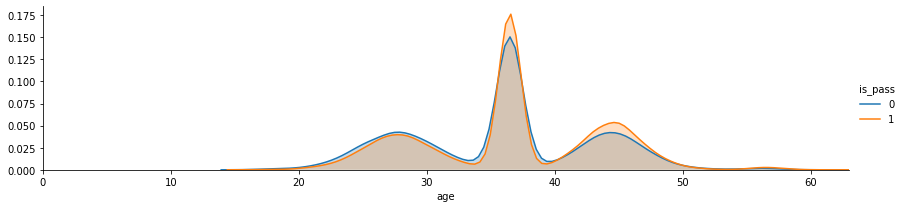

In [17]:
#plot distributions of age of students who passed or did not pass
a = sns.FacetGrid( train, hue = 'is_pass', aspect=4 )
a.map(sns.kdeplot, 'age', shade= True )
a.set(xlim=(0 , train['age'].max()))
a.add_legend()

In [18]:
#create age band to check pass rate
for data in all_data: 
    data['AgeBand'] = pd.cut(train['age'], 7)

train[['AgeBand', 'is_pass']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,is_pass
0,"(16.954, 23.571]",0.604258
1,"(23.571, 30.143]",0.670019
2,"(30.143, 36.714]",0.690092
3,"(36.714, 43.286]",0.713453
4,"(43.286, 49.857]",0.735030
5,"(49.857, 56.429]",0.680143
6,"(56.429, 63.0]",0.820789


In [19]:
#check test_type and difficulty_level pass rate
train[['test_type','difficulty_level','is_pass']].groupby(['test_type','difficulty_level'], as_index=False).mean()

,test_type,difficulty_level,is_pass
0,offline,easy,0.616462
1,offline,hard,0.667573
2,offline,intermediate,0.654877
3,offline,vary hard,0.430562
4,online,easy,0.779996


In [20]:
#create new feature with combination of test_type + difficulty_level
for data in all_data:
    data['test_type_diff_level'] = data['test_type'] + '_' + data['difficulty_level']

In [21]:
#code categorical data
label = LabelEncoder()
for dataset in all_data:    
    dataset['program_id_code'] = label.fit_transform(dataset['program_id'])
    dataset['program_type_code'] = label.fit_transform(dataset['program_type'])
    dataset['test_type_code'] = label.fit_transform(dataset['test_type'])
    dataset['difficulty_level_code'] = label.fit_transform(dataset['difficulty_level'])
    dataset['gender_code'] = label.fit_transform(dataset['gender'])
    dataset['education_code'] = label.fit_transform(dataset['education'])
    dataset['is_handicapped_code'] = label.fit_transform(dataset['is_handicapped'])
    dataset['AgeBand_code'] = label.fit_transform(dataset['AgeBand'])
    dataset['test_diff_code'] = label.fit_transform(dataset['test_type_diff_level'])

In [22]:
#get numerical columns
numerical_cols = ['city_tier','total_programs_enrolled','age','trainee_engagement_rating','program_duration']
#get categorical columns
categorical_cols = ['program_id_code','program_type_code','test_type_code','difficulty_level_code','gender_code','education_code','is_handicapped_code']
#get all cols
all_cols = numerical_cols + categorical_cols

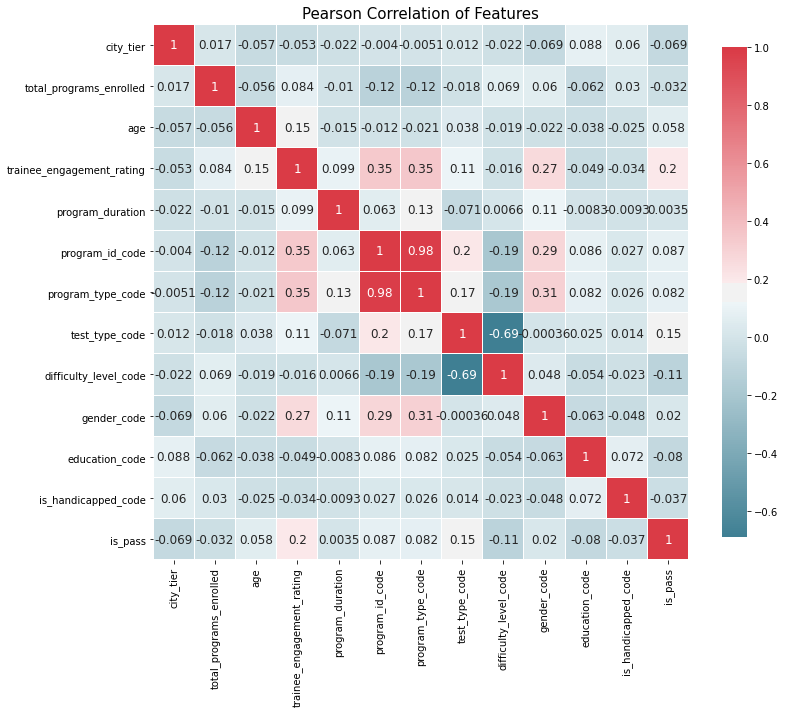

In [23]:
#heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(12, 10))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

all_cols_with_y = all_cols + ['is_pass']
data1 = train[all_cols_with_y].copy()
correlation_heatmap(data1)

In [24]:
X = train[all_cols].copy()
y = train.is_pass
X_test = test[all_cols].copy()

In [25]:
# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                      train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [26]:
# machine learning model
model_1 = RandomForestClassifier()
model_2 = XGBClassifier()
model_3 = CatBoostClassifier()

In [27]:
# fit model
my_model = model_2
my_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [28]:
#check score
y_valid_pred = my_model.predict_proba(X_valid[all_cols])[:,1]
auc_roc = roc_auc_score(y_valid, y_valid_pred)
print("AUC ROC: %.2f%%" % (auc_roc))

AUC ROC: 0.74%


In [29]:
#fit with all data
my_model.fit(X,y)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [30]:
#predict X_test
test_preds = my_model.predict_proba(X_test)[:,1]

In [31]:
#save output
output = pd.DataFrame({'id': X_test.index,
                     'is_pass': test_preds})
output.to_csv('XGBClassifier_submission_V3.csv', index=False)